<h3>ФБ-21 Князян Кирило</h3>
<h1><center><b> Лабораторна робота №6 </b></center></h1>
<h2><center> Застосування numpy </center></h2>

In [37]:
import matplotlib.pyplot as plt
import numpy as np
print("Setup Complete")

Setup Complete


<h3><center> Завдання 1 </center></h3>

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random: бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

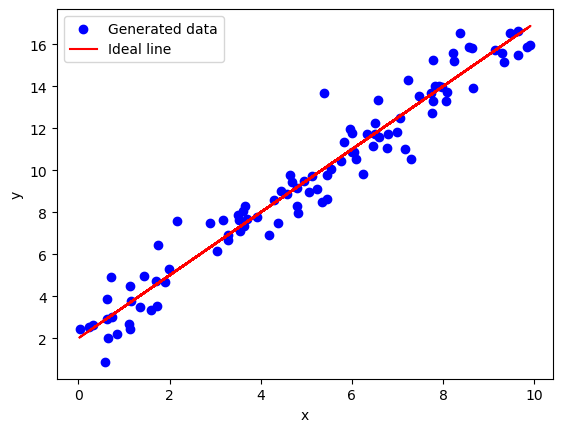

In [38]:
k = 1.5
b = 2
n = 100
x = np.random.uniform(0, 10, n)
y = k * x + b + np.random.normal(0, 1, n)

plt.scatter(x, y, color='blue', label='Generated data')
plt.plot(x, k*x+b, color='red', label='Ideal line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [39]:
def least_squares(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    k = (np.mean(x*y) - mean_y * mean_x) / (np.mean(x*x) - mean_x * mean_x)
    b = mean_y - k * mean_x

    return (k, b)

k_ls, b_ls = least_squares(x, y)
print(f"Оцінені параметри: k = {k_ls}, b = {b_ls}")

Оцінені параметри: k = 1.4820488669182488, b = 2.06573927591052


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [40]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)
print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Параметри за методом найменших квадратів: k = {k_ls}, b = {b_ls}")
print(f"Оцінені параметри з np.polyfit: k = {k_polyfit}, b = {b_polyfit}")

Початкові параметри: k = 1.5, b = 2
Параметри за методом найменших квадратів: k = 1.4820488669182488, b = 2.06573927591052
Оцінені параметри з np.polyfit: k = 1.4820488669182459, b = 2.0657392759105324


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

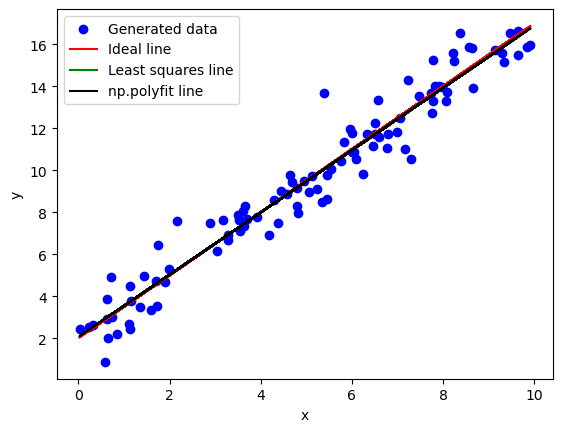

In [41]:
plt.scatter(x, y, color='blue', label='Generated data')
plt.plot(x, k*x+b, color='red', label='Ideal line')
plt.plot(x, k_ls*x+b_ls, color='green', label='Least squares line')
plt.plot(x, k_polyfit*x+b_polyfit, color='black', label='np.polyfit line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3><center> Завдання 2 </center></h3>

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [42]:
def gradient_descent(x, y, learning_rate, n_iter):
    k_gr = 0
    b_gr = 0
    errors = []
    
    for _ in range(n_iter):
        y_prev = k_gr * x + b_gr
        errors.append(np.mean((y - y_prev)**2))
        dk_gr = -2 * np.dot(x, y - y_prev) / n
        db_gr = -2 * np.sum(y - y_prev) / n
        
        k_gr -= learning_rate * dk_gr
        b_gr -= learning_rate * db_gr
    
    return k_gr, b_gr, errors

learning_rate = 0.01
n_iter = 1000

k_gr, b_gr, errors = gradient_descent(x, y, learning_rate, n_iter)
print(f"Параметри за методом градієнтного спуску: k = {k_gr}, b = {b_gr}")

Параметри за методом градієнтного спуску: k = 1.4851194182822625, b = 2.0457479395811733


2. Додайте отриману лінію регресії на загальний графік

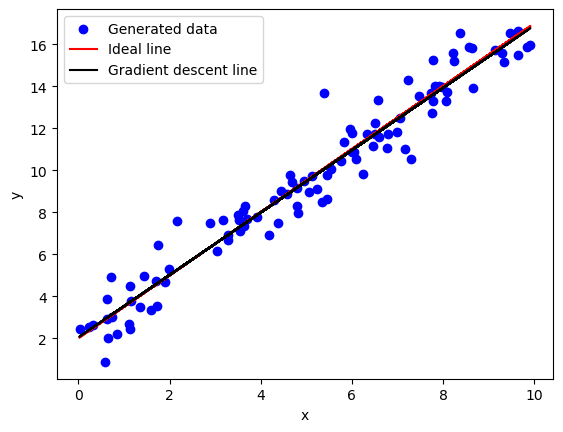

In [43]:
plt.scatter(x, y, color='blue', label='Generated data')
plt.plot(x, k*x+b, color='red', label='Ideal line')
plt.plot(x, k_gr*x+b_gr, color='black', label='Gradient descent line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

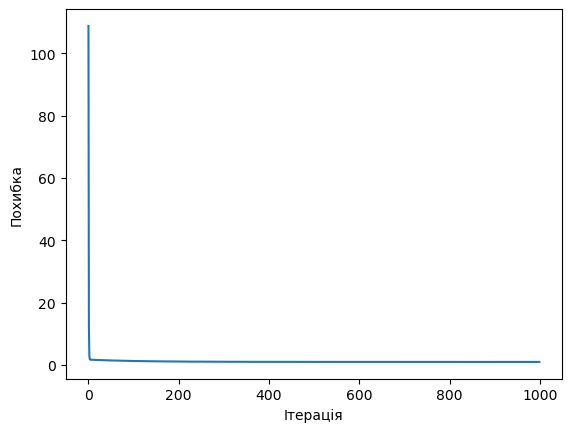

In [44]:
plt.plot(errors)
plt.xlabel('Ітерація')
plt.ylabel('Похибка')
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

In [45]:
print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Параметри за методом найменших квадратів: k = {k_ls}, b = {b_ls}")
print(f"Оцінені параметри з np.polyfit: k = {k_polyfit}, b = {b_polyfit}")
print(f"Параметри за методом градієнтного спуску: k = {k_gr}, b = {b_gr}")

Початкові параметри: k = 1.5, b = 2
Параметри за методом найменших квадратів: k = 1.4820488669182488, b = 2.06573927591052
Оцінені параметри з np.polyfit: k = 1.4820488669182459, b = 2.0657392759105324
Параметри за методом градієнтного спуску: k = 1.4851194182822625, b = 2.0457479395811733
